In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
import pandas as pd
import librosa
import sounddevice as sd
sns.set()
from matplotlib import rcParams
rcParams['figure.figsize'] = 11.7,8.27

In [4]:
class RLS:
    def __init__(self, num_vars, lam, delta):
        '''
        num_vars: number of variables including constant
        lam: forgetting factor, usually very close to 1.
        '''
        self.num_vars = num_vars
        
        # delta controls the initial state.
        self.A = delta*np.matrix(np.identity(self.num_vars))
        self.w = np.matrix(np.zeros(self.num_vars))
        self.w = self.w.reshape(self.w.shape[1],1)
        
        # Variables needed for add_obs
        self.lam_inv = lam**(-1)
        self.sqrt_lam_inv = math.sqrt(self.lam_inv)
        
        # A priori error
        self.a_priori_error = 0
        
        # Count of number of observations added
        self.num_obs = 0

    def add_obs(self, x, t):
        '''
        Add the observation x with label t.
        x is a column vector as a numpy matrix
        t is a real scalar
        '''            
        z = self.lam_inv*self.A*x
        alpha = float((1 + x.T*z)**(-1))
        self.a_priori_error = float(t - self.w.T*x)
        self.w = self.w + (t-alpha*float(x.T*(self.w+t*z)))*z
        self.A -= alpha*z*z.T
        self.num_obs += 1
        
    def fit(self, X, y):
        '''
        Fit a model to X,y.
        X and y are numpy arrays.
        Individual observations in X should have a prepended 1 for constant coefficient.
        '''
        for i in range(len(X)):
            x = np.transpose(np.matrix(X[i]))
            self.add_obs(x,y[i])


    def get_error(self):
        '''
        Finds the a priori (instantaneous) error. 
        Does not calculate the cumulative effect
        of round-off errors.
        '''
        return self.a_priori_error
    
    def predict(self, x):
        '''
        Predict the value of observation x. x should be a numpy matrix (col vector)
        '''
        return float(self.w.T*x)

C:\Users\sriva\AppData\Local\Temp\ipykernel_21844\3084734407.py:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pred_y.append(float(x*LS.w))
C:\Users\sriva\AppData\Local\Temp\ipykernel_21844\2934825205.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  alpha = float((1 + x.T*z)**(-1))
C:\Users\sriva\AppData\Local\Temp\ipykernel_21844\2934825205.py:32: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  self.a_priori_error = float(t - self.w.T*x)
C:\Users\sriva\AppDat

[[ 4.35957446e-02]
 [-2.83953916e-03]
 [ 8.94498236e-05]]


ValueError: x and y must have same first dimension, but have shapes (40,) and (1,)

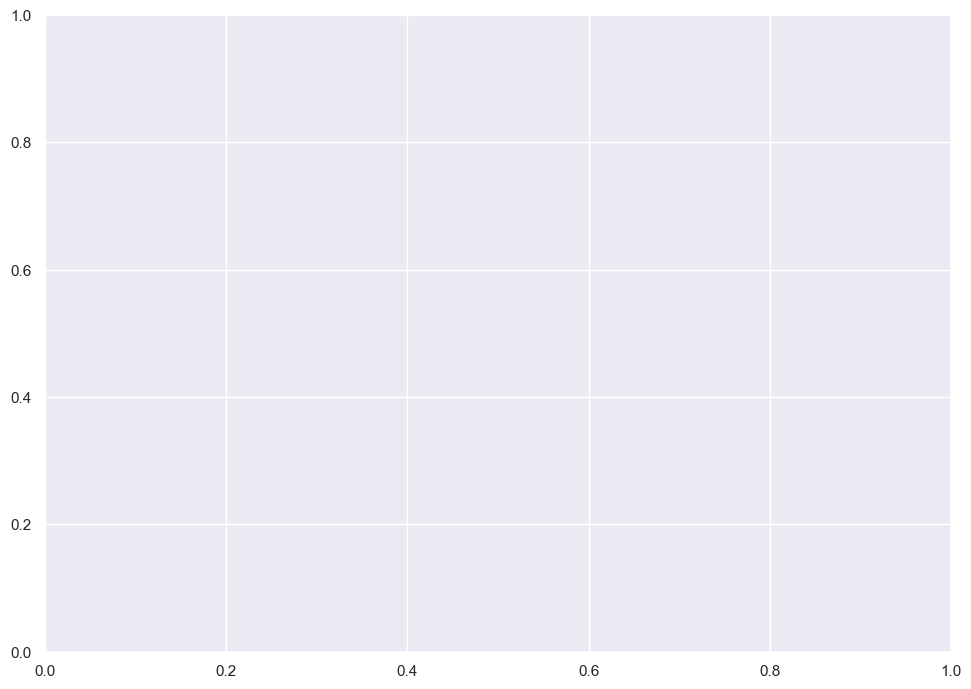

In [7]:


# Load the audio signal
audio_file = r"E:\frnds\python\clean_speech\harvard.wav"
audio_signal, sample_rate = librosa.load(audio_file, sr=None)

# Generate Gaussian noise with the same length as the audio signal
noise = 0.05 * np.random.randn(len(audio_signal))

# Add noise to the audio signal
noisy_input_signal = audio_signal + noise
noisy_y = noisy_input_signal + noise
lam = 0.98
LS = RLS(3,lam,1)
# Not using the RLS.fit function because I want to remember all the predicted values
pred_x = []
pred_y = []
for i in range(len(audio_file)):
    x = np.matrix(np.zeros((1,3)))
    x[0,0] = 1
    x[0,1] = i
    x[0,2] = i**2
    pred_x.append(i)
    pred_y.append(float(x*LS.w))
    LS.add_obs(x.T,noisy_y[i])
print(LS.w)
# plot the predicted values against the non-noisy output
ax = plt.plot(pred_x, LS)
plt.show()

In [7]:

# Your audio processing code
audio_file = r"E:\frnds\python\clean_speech\harvard.wav"
audio_signal, sample_rate = librosa.load(audio_file, sr=None)
noise = 0.05 * np.random.randn(len(audio_signal))
noisy_input_signal = audio_signal + noise
noisy_y = noisy_input_signal + noise

# Parameters
num_vars = 3
lam = 0.98
delta = 1

# Initialize RLS filter
LS = RLS(num_vars, lam, delta)

# Add observations and perform predictions
pred_x = []
pred_y = []
for i in range(len(audio_signal)):
    x = np.matrix(np.zeros((num_vars, 1)))
    x[0, 0] = 1
    x[1, 0] = i
    x[2, 0] = i**2
    pred_x.append(i)
    pred_y.append(float(x.T * LS.w))
    LS.add_obs(x, noisy_y[i])
print("Playing original signal...")
sd.play(audio_signal, sample_rate)
sd.wait()

# Play noisy input signal
print("Playing noisy input signal...")
sd.play(noisy_input_signal, sample_rate)
sd.wait()

# Play filtered output signal

# Convert the output data to a NumPy array with a compatible data type
output_array = np.array(LS, dtype=np.float32)

# Assuming sample_rate is defined elsewhere
# Play the converted array using sounddevice
sd.play(output_array, sample_rate)
sd.wait()

# Plotting
plt.plot(pred_x, pred_y)
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.title('RLS Prediction')
plt.grid(True)
plt.show()


C:\Users\sriva\AppData\Local\Temp\ipykernel_29448\52491167.py:25: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pred_y.append(float(x.T * LS.w))
C:\Users\sriva\AppData\Local\Temp\ipykernel_29448\4020529062.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  alpha = float((1 + x.T * z)**(-1))
C:\Users\sriva\AppData\Local\Temp\ipykernel_29448\4020529062.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  self.a_priori_error = float(t - self.w.T * x)
C:\Users\sriva\

Playing original signal...
Playing noisy input signal...


TypeError: float() argument must be a string or a real number, not 'RLS'